In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd

import sys
sys.path.append("../../../")
from gradboost_pv.models.basic import load_local_preprocessed_slice, build_datasets_from_local
# from gradboost_pv.models.common import get_rolling_linear_regression_betas

In [2]:
# nwp_path = "gs://solar-pv-nowcasting-data/NWP/UK_Met_Office/UKV_intermediate_version_4.zarr/"
nwp_path = "gs://solar-pv-nowcasting-data/NWP/UK_Met_Office/UKV_intermediate_version_3.zarr"
gsp_path = "gs://solar-pv-nowcasting-data/PV/GSP/v5/pv_gsp.zarr"
gsp = xr.open_zarr(gsp_path)
nwp = xr.open_zarr(nwp_path)

evaluation_timeseries = gsp.coords["datetime_gmt"].where(
        (gsp["datetime_gmt"] >= nwp.coords["init_time"].values[0]) & (gsp["datetime_gmt"] <= nwp.coords["init_time"].values[-1]), 
        drop=True).values

gsp = gsp.sel(datetime_gmt = evaluation_timeseries, gsp_id=0)

In [6]:
nwp

<xarray.Dataset>
Dimensions:    (variable: 17, init_time: 5319, step: 37, y: 704, x: 548)
Coordinates:
  * init_time  (init_time) datetime64[ns] 2020-01-01 ... 2021-11-08T15:00:00
  * step       (step) timedelta64[ns] 00:00:00 01:00:00 ... 1 days 12:00:00
  * variable   (variable) <U6 'cdcb' 'lcc' 'mcc' ... 'wdir10' 'prmsl' 'prate'
  * x          (x) int64 -239000 -237000 -235000 ... 851000 853000 855000
  * y          (y) int64 1223000 1221000 1219000 ... -179000 -181000 -183000
Data variables:
    UKV        (variable, init_time, step, y, x) float32 dask.array<chunksize=(17, 1, 1, 352, 274), meta=np.ndarray>

In [8]:
from gradboost_pv.models.experiment import run_experiment, plot_feature_importances, plot_loss_metrics

results = dict()

for step in range(36):
    _slice = load_local_preprocessed_slice(step)
    _slice = _slice.reshape(_slice.shape[1], _slice.shape[2])
    X, y = build_datasets_from_local(_slice, gsp, nwp.coords["step"].values[step])
    output = run_experiment(X, y)
    results[step] = output
    print(f"Completed run for step {step}")
    

Completed run for step 0
Completed run for step 1
Completed run for step 2
Completed run for step 3
Completed run for step 4
Completed run for step 5
Completed run for step 6
Completed run for step 7
Completed run for step 8
Completed run for step 9
Completed run for step 10
Completed run for step 11
Completed run for step 12
Completed run for step 13
Completed run for step 14
Completed run for step 15
Completed run for step 16
Completed run for step 17
Completed run for step 18
Completed run for step 19
Completed run for step 20
Completed run for step 21
Completed run for step 22
Completed run for step 23
Completed run for step 24
Completed run for step 25
Completed run for step 26
Completed run for step 27
Completed run for step 28
Completed run for step 29
Completed run for step 30
Completed run for step 31
Completed run for step 32
Completed run for step 33
Completed run for step 34
Completed run for step 35


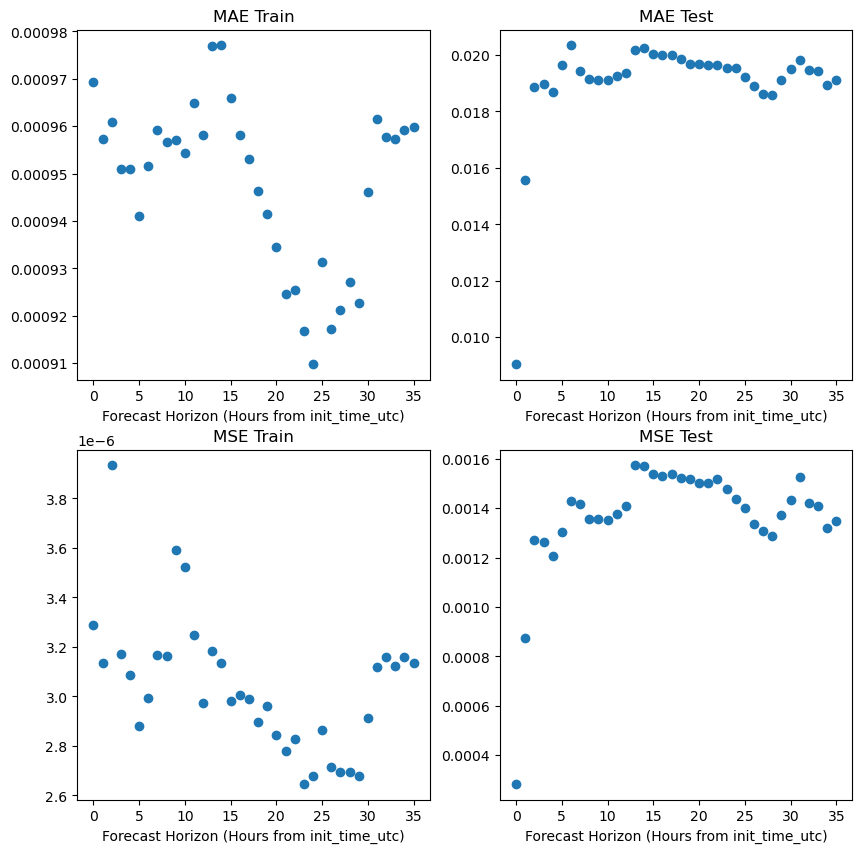

In [9]:
plot_loss_metrics(results)

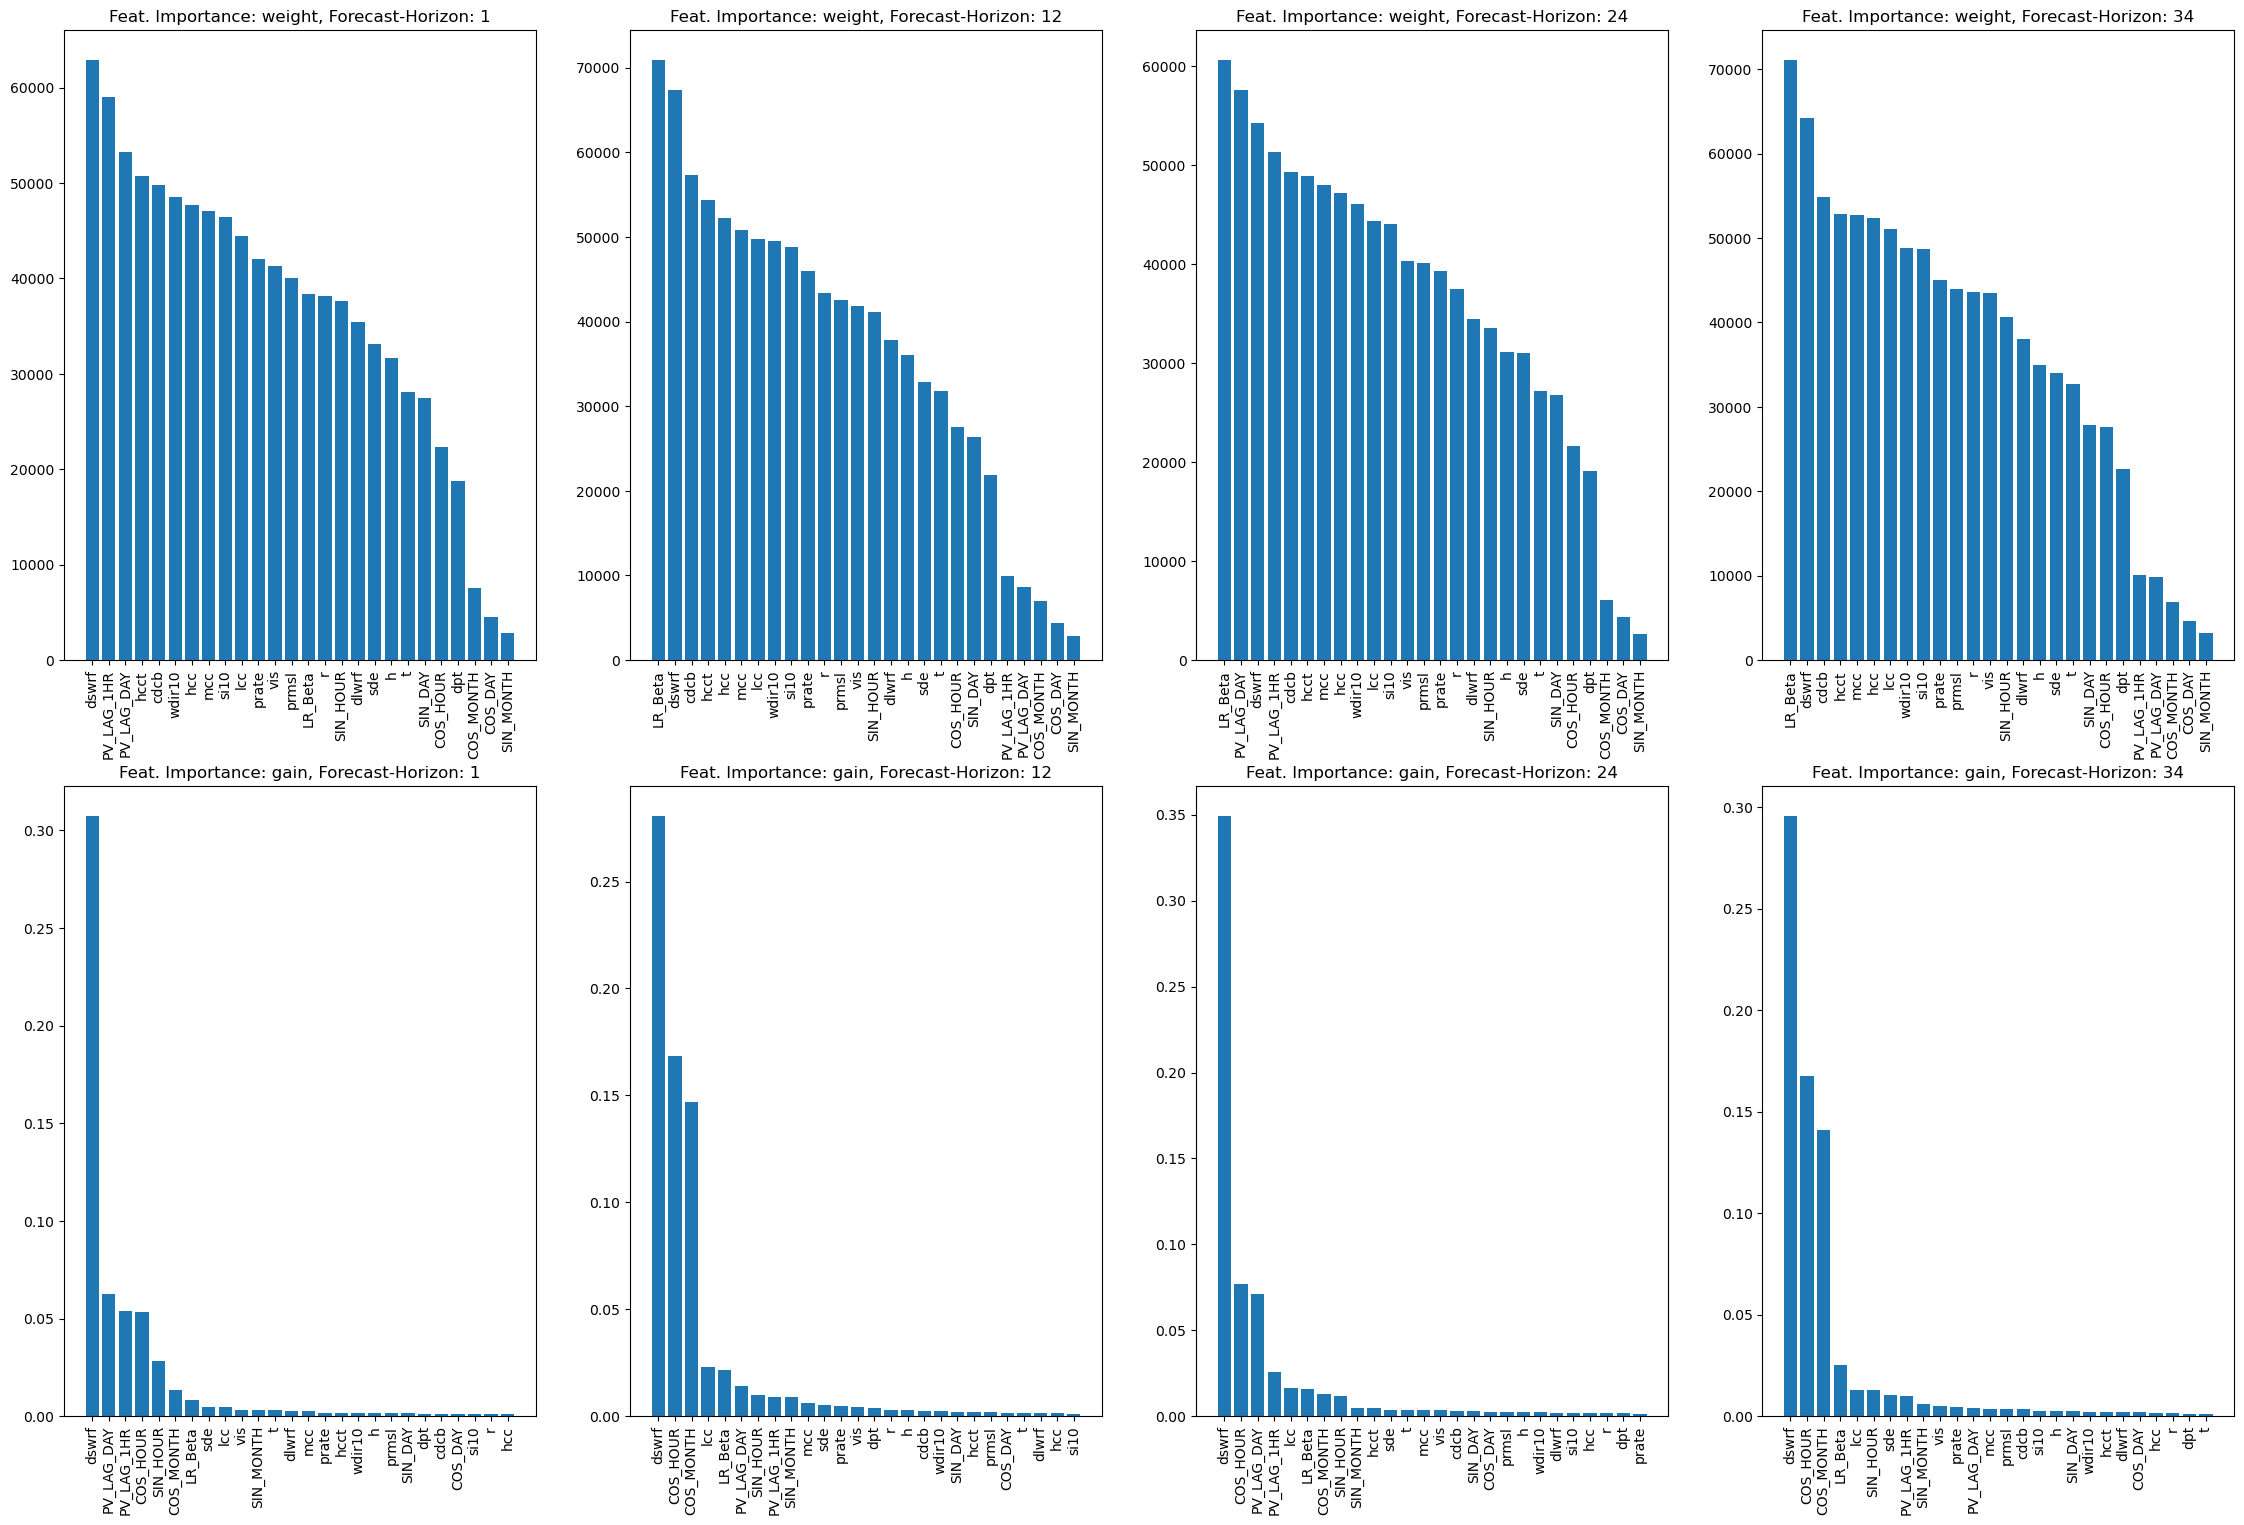

In [10]:
plot_feature_importances(results)

In [4]:
_slice = load_local_preprocessed_slice(25)
_slice = _slice.reshape(_slice.shape[1], _slice.shape[2])

In [5]:
X, y = build_datasets_from_local(_slice, gsp, nwp.coords["step"].values[0])

In [15]:
step = np.timedelta64(1, "h")

In [17]:
y

,target
2020-01-02 00:00:00,0.000000
2020-01-02 00:30:00,0.000000
2020-01-02 01:00:00,0.000000
2020-01-02 01:30:00,0.000000
2020-01-02 02:00:00,0.000000
...,...
2021-11-08 13:00:00,0.191085
2021-11-08 13:30:00,0.159681
2021-11-08 14:00:00,0.144202
2021-11-08 14:30:00,0.093407


In [16]:
y.shift(freq=step)

,target
2020-01-02 01:00:00,0.000000
2020-01-02 01:30:00,0.000000
2020-01-02 02:00:00,0.000000
2020-01-02 02:30:00,0.000000
2020-01-02 03:00:00,0.000000
...,...
2021-11-08 14:00:00,0.191085
2021-11-08 14:30:00,0.159681
2021-11-08 15:00:00,0.144202
2021-11-08 15:30:00,0.093407


In [18]:
from gradboost_pv.models.common import build_rolling_linear_regression_betas

<AxesSubplot: >

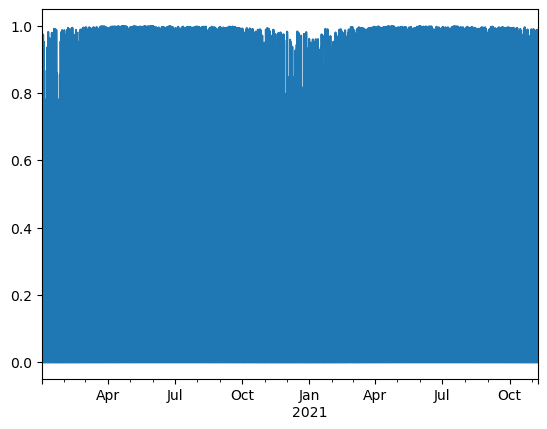

In [20]:
build_rolling_linear_regression_betas(y.shift(freq=step), y).plot()

In [11]:
from gradboost_pv.models.experiment import run_experiment, plot_feature_importances, plot_loss_metrics

In [12]:
results = run_experiment(X, y)

In [13]:
results

ExperimentSummary(mse_train_loss=3.633887525437456e-06, mse_test_loss=0.00029456671211408256, mae_train_loss=0.0010276572889481887, mae_test_loss=0.009215731758435474, model=XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.85,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.005, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=100, max_leaves=0, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, ...))

In [21]:
from numba import njit

@njit
def _linear_trend_estimation(data: np.ndarray, epsilon=0.01):
    _x, _y = np.ascontiguousarray(data[:, 0]), np.ascontiguousarray(data[:, 1])
    return max(min((1 / ((np.dot(_x,  _x)) + epsilon)) * (np.dot(_x,  _y)), 10), -10)

def get_rolling_betas(X: pd.DataFrame, y: pd.DataFrame, window_size: int=10):
    data = pd.concat([X, y], axis=1)
    _betas = data.rolling(window=window_size, method="table").apply(_linear_trend_estimation, engine="numba")["x"]
    
    


<AxesSubplot: >

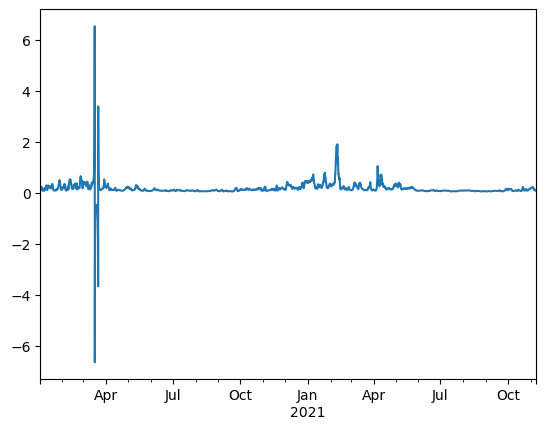

In [22]:
X.rename(columns={"h": "x", "t": "y"})[["x", "y"]].rolling(window=10, method="table").apply(linear_trend_estimation, raw=True, engine="numba")["x"].plot()

In [ ]:
 window_size = 10
    epsilon = 0.01
    y_covariates = y.shift(freq=(forecast_horizon + np.timedelta64(2, "h")))
    y_covariates.columns = ["x"]
    y_target = y.shift(freq=(forecast_horizon + np.timedelta64(1, "h")))
    y_target.columns = ["y"]
    data = pd.concat([y_target, y_covariates], axis=1).dropna()
    _x = data["x"].values
    _y = data["y"].values
    _betas = np.nan * np.empty(len(data))

    for n in range(window_size, len(data)):
        __y = _y[(n - window_size) : n]
        __x = _x[(n - window_size) : n]
        __b = max(min((1 / ((__x.T @ __x) + epsilon)) * (__x.T @ __y), 10), -10)
        _betas[n] = __b


In [14]:
np.dot(X["cdcb"].values, X["lcc"].values)

2309357274.8250256

In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from dataclasses import dataclass

DEFFAULT_HYPARAM_CONFIG = {
               'objective': 'reg:squarederror',
               'booster': 'gbtree',
               'colsample_bylevel': 1,
               'colsample_bynode': 1,
               'colsample_bytree': 0.85,
               'early_stopping_rounds': None,
               'gamma': 0,
               'gpu_id': -1,
               'grow_policy': 'depthwise',
               'importance_type': None,
               'interaction_constraints': '',
               'learning_rate': 0.01,
               'max_bin': 256,
               'max_cat_threshold': 64,
               'max_depth': 50,
               'max_leaves': 0,
               'min_child_weight': 20,
               'n_estimators': 1500,
               'n_jobs': -1,
               'num_parallel_tree': 1,
               'predictor': 'auto',
               'random_state': 0,
               'reg_alpha': 0,
               'reg_lambda': 1,
               'sampling_method': 'uniform',
               'scale_pos_weight': 1,
               'subsample': 0.85,
               'tree_method': 'hist',
               'validate_parameters': 1,
               'verbosity': 1
 }


@dataclass
class ExperimentSummary:
    mse_train_loss: float
    mse_test_loss: float
    mae_train_loss: float
    mae_test_loss: float
    model: XGBRegressor



def run_experiment(X: pd.DataFrame,
                   y: pd.DataFrame,
                   booster_hyperparam_config: dict = DEFFAULT_HYPARAM_CONFIG
                   ) -> ExperimentSummary:

    # use 2020 as training period and 2021 as test
    X_train, y_train = X.loc[X.index < "2021-01-01"], y.loc[y.index < "2021-01-01"]
    X_test, y_test = X.loc[X.index >= "2021-01-01"], y.loc[y.index >= "2021-01-01"]

    model = XGBRegressor(**booster_hyperparam_config)
    model.fit(X_train, y_train)
    
    y_pred_test, y_pred_train = model.predict(X_test), model.predict(X_train)
    train_mse, test_mse = mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test)
    train_mae, test_mae = mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test)
        
    
    return ExperimentSummary(
        train_mse,
        test_mse,
        train_mae,
        test_mae,
        model  # just save the last trained model for nwp
    )
        

In [7]:
results = dict()

for step in range(0, 36):
    # can't really multiprocess this since the xgb training maxes out the cores anyway
    _slice = load_local_preprocessed_slice(step)
    X, y = build_datasets_from_local(_slice, gsp, nwp.coords["step"].values[step])
    output = run_experiment(X, y)
    results[step] = output
    print(f"Completed run for step {step}")

Completed run for step 0
Completed run for step 1
Completed run for step 2
Completed run for step 3
Completed run for step 4
Completed run for step 5
Completed run for step 6
Completed run for step 7
Completed run for step 8
Completed run for step 9
Completed run for step 10
Completed run for step 11
Completed run for step 12
Completed run for step 13
Completed run for step 14
Completed run for step 15
Completed run for step 16
Completed run for step 17
Completed run for step 18
Completed run for step 19
Completed run for step 20
Completed run for step 21
Completed run for step 22
Completed run for step 23
Completed run for step 24
Completed run for step 25
Completed run for step 26
Completed run for step 27
Completed run for step 28
Completed run for step 29
Completed run for step 30
Completed run for step 31
Completed run for step 32
Completed run for step 33
Completed run for step 34
Completed run for step 35


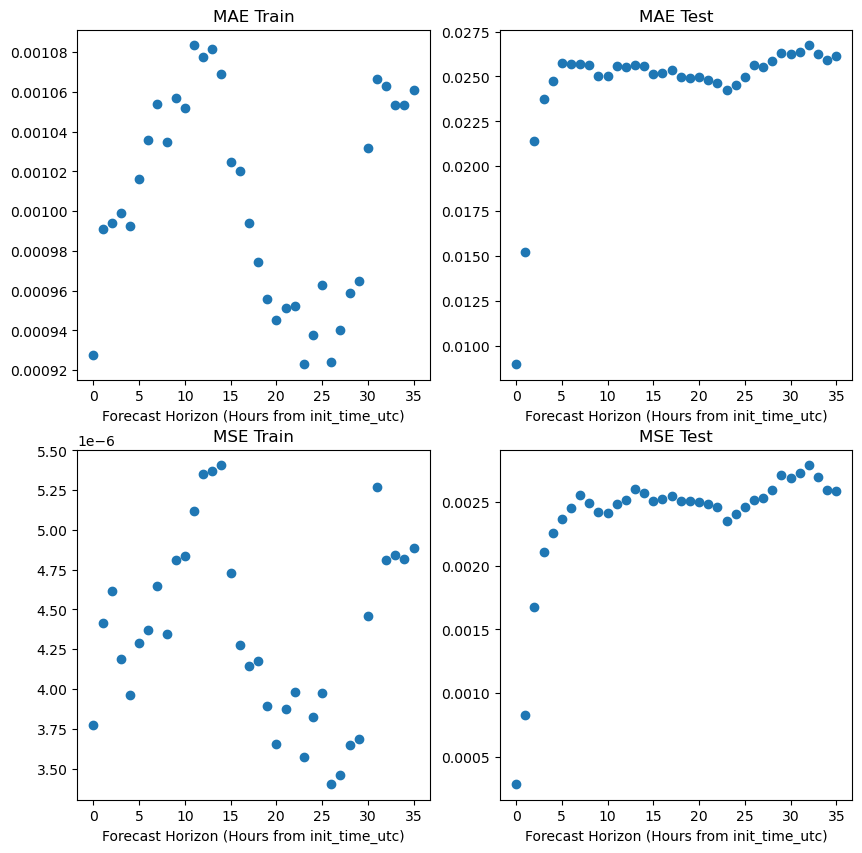

In [8]:
# plot the MAE of the OOS for each model
from typing import Dict

def plot_loss_metrics(results_by_fh: Dict[int, ExperimentSummary]):
    title_mapping = {"MAE Train": lambda x: x.mae_train_loss,
                     "MAE Test": lambda x: x.mae_test_loss,
                     "MSE Train": lambda x: x.mse_train_loss,
                     "MSE Test": lambda x: x.mse_test_loss}
    
    fig, axes = plt.subplots(2,2, figsize=(10, 10))
    
    for idx, title in enumerate(title_mapping.keys()):
        row = int(idx > 1)
        col = idx % 2
        data = pd.Series({step: title_mapping[title](r) for step, r in results_by_fh.items()})
        axes[row][col].scatter(data.index, data.values)
        axes[row][col].set_title(title)
        axes[row][col].set_xlabel("Forecast Horizon (Hours from init_time_utc)")

plot_loss_metrics(results)

In [4]:
from gradboost_pv.models.utils import ORDERED_NWP_FEATURE_VARIABLES

X = pd.DataFrame(data=_slice.reshape(_slice.shape[1], _slice.shape[2]).T, index=gsp.coords["datetime_gmt"].values, columns=ORDERED_NWP_FEATURE_VARIABLES)

In [22]:
X


,cdcb,lcc,mcc,hcc,sde,hcct,dswrf,dlwrf,h,t,r,dpt,vis,si10,wdir10,prmsl,prate
2020-01-01 00:00:00,632.369995,70.870087,5.830586,32.670364,0.001283,-32629.847656,0.000000,316.232666,2688.883789,280.208954,85.932365,277.964325,15064.458008,6.881776,188.229904,102725.976562,0.000001
2020-01-01 00:30:00,687.646356,70.705035,5.433613,32.899234,0.001283,-32629.835099,-0.193904,315.983130,2702.628593,280.190395,85.942563,277.952649,14880.364175,6.862118,188.265013,102700.899462,0.000001
2020-01-01 01:00:00,742.721343,70.725728,5.330769,33.388923,0.001283,-32629.829391,-0.282043,316.028534,2710.335820,280.176540,85.968588,277.946975,14746.720178,6.856966,188.589163,102674.871755,0.000001
2020-01-01 01:30:00,797.380025,70.899727,5.482882,34.104579,0.001283,-32629.829162,-0.285568,316.322121,2712.813544,280.166897,86.008677,277.946697,14655.544720,6.864013,189.151146,102648.336949,0.000001
2020-01-01 02:00:00,851.407470,71.194592,5.850780,35.011349,0.001283,-32629.833044,-0.225634,316.817136,2710.869839,280.160970,86.061064,277.951208,14598.856503,6.880958,189.899750,102621.738550,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08 13:00:00,1506.390751,64.635937,52.425588,55.233770,0.000025,-32629.864650,116.463900,346.732082,3121.229402,284.948535,83.848250,282.240042,16736.953173,6.910919,221.490776,101661.084446,0.000043
2021-11-08 13:30:00,1459.914016,65.062383,53.152989,55.220780,0.000025,-32629.869164,105.952857,347.436060,3117.175423,285.026305,83.854154,282.318850,16856.013534,6.996771,222.303429,101641.143742,0.000041
2021-11-08 14:00:00,1404.634326,65.555342,54.093611,54.979213,0.000025,-32629.868898,89.743944,348.004202,3108.765539,285.047827,84.073472,282.381354,16874.653570,7.072594,222.936996,101620.714499,0.000042
2021-11-08 14:30:00,1341.477141,66.105792,55.259969,54.463322,0.000025,-32629.862260,67.237410,348.401999,3095.530420,285.003983,84.544713,282.425687,16775.666540,7.135707,223.324433,101600.087789,0.000046


In [23]:
X2 = X.shift(freq=-shift)
X2

,cdcb,lcc,mcc,hcc,sde,hcct,dswrf,dlwrf,h,t,r,dpt,vis,si10,wdir10,prmsl,prate
2019-12-31 23:00:00,632.369995,70.870087,5.830586,32.670364,0.001283,-32629.847656,0.000000,316.232666,2688.883789,280.208954,85.932365,277.964325,15064.458008,6.881776,188.229904,102725.976562,0.000001
2019-12-31 23:30:00,687.646356,70.705035,5.433613,32.899234,0.001283,-32629.835099,-0.193904,315.983130,2702.628593,280.190395,85.942563,277.952649,14880.364175,6.862118,188.265013,102700.899462,0.000001
2020-01-01 00:00:00,742.721343,70.725728,5.330769,33.388923,0.001283,-32629.829391,-0.282043,316.028534,2710.335820,280.176540,85.968588,277.946975,14746.720178,6.856966,188.589163,102674.871755,0.000001
2020-01-01 00:30:00,797.380025,70.899727,5.482882,34.104579,0.001283,-32629.829162,-0.285568,316.322121,2712.813544,280.166897,86.008677,277.946697,14655.544720,6.864013,189.151146,102648.336949,0.000001
2020-01-01 01:00:00,851.407470,71.194592,5.850780,35.011349,0.001283,-32629.833044,-0.225634,316.817136,2710.869839,280.160970,86.061064,277.951208,14598.856503,6.880958,189.899750,102621.738550,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08 12:00:00,1506.390751,64.635937,52.425588,55.233770,0.000025,-32629.864650,116.463900,346.732082,3121.229402,284.948535,83.848250,282.240042,16736.953173,6.910919,221.490776,101661.084446,0.000043
2021-11-08 12:30:00,1459.914016,65.062383,53.152989,55.220780,0.000025,-32629.869164,105.952857,347.436060,3117.175423,285.026305,83.854154,282.318850,16856.013534,6.996771,222.303429,101641.143742,0.000041
2021-11-08 13:00:00,1404.634326,65.555342,54.093611,54.979213,0.000025,-32629.868898,89.743944,348.004202,3108.765539,285.047827,84.073472,282.381354,16874.653570,7.072594,222.936996,101620.714499,0.000042
2021-11-08 13:30:00,1341.477141,66.105792,55.259969,54.463322,0.000025,-32629.862260,67.237410,348.401999,3095.530420,285.003983,84.544713,282.425687,16775.666540,7.135707,223.324433,101600.087789,0.000046


In [32]:
X2.shift(freq=(shift + np.timedelta64(1, "h")))

,cdcb,lcc,mcc,hcc,sde,hcct,dswrf,dlwrf,h,t,r,dpt,vis,si10,wdir10,prmsl,prate
2020-01-01 01:00:00,632.369995,70.870087,5.830586,32.670364,0.001283,-32629.847656,0.000000,316.232666,2688.883789,280.208954,85.932365,277.964325,15064.458008,6.881776,188.229904,102725.976562,0.000001
2020-01-01 01:30:00,687.646356,70.705035,5.433613,32.899234,0.001283,-32629.835099,-0.193904,315.983130,2702.628593,280.190395,85.942563,277.952649,14880.364175,6.862118,188.265013,102700.899462,0.000001
2020-01-01 02:00:00,742.721343,70.725728,5.330769,33.388923,0.001283,-32629.829391,-0.282043,316.028534,2710.335820,280.176540,85.968588,277.946975,14746.720178,6.856966,188.589163,102674.871755,0.000001
2020-01-01 02:30:00,797.380025,70.899727,5.482882,34.104579,0.001283,-32629.829162,-0.285568,316.322121,2712.813544,280.166897,86.008677,277.946697,14655.544720,6.864013,189.151146,102648.336949,0.000001
2020-01-01 03:00:00,851.407470,71.194592,5.850780,35.011349,0.001283,-32629.833044,-0.225634,316.817136,2710.869839,280.160970,86.061064,277.951208,14598.856503,6.880958,189.899750,102621.738550,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08 14:00:00,1506.390751,64.635937,52.425588,55.233770,0.000025,-32629.864650,116.463900,346.732082,3121.229402,284.948535,83.848250,282.240042,16736.953173,6.910919,221.490776,101661.084446,0.000043
2021-11-08 14:30:00,1459.914016,65.062383,53.152989,55.220780,0.000025,-32629.869164,105.952857,347.436060,3117.175423,285.026305,83.854154,282.318850,16856.013534,6.996771,222.303429,101641.143742,0.000041
2021-11-08 15:00:00,1404.634326,65.555342,54.093611,54.979213,0.000025,-32629.868898,89.743944,348.004202,3108.765539,285.047827,84.073472,282.381354,16874.653570,7.072594,222.936996,101620.714499,0.000042
2021-11-08 15:30:00,1341.477141,66.105792,55.259969,54.463322,0.000025,-32629.862260,67.237410,348.401999,3095.530420,285.003983,84.544713,282.425687,16775.666540,7.135707,223.324433,101600.087789,0.000046
